In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

In [3]:
df = pd.read_csv("aqsoldb.csv")

In [4]:
# creating list of molecules in dataset using RDKit and SMILES
mol_list = []

for i in df.SMILES:
    molecule = Chem.MolFromSmiles(i)
    mol_list.append(molecule)


# creating descriptors of all molecules
complete_mol_desc = []

for molecule in mol_list:
    mol_desc = {}

    for name, function in Descriptors._descList: # Descriptors._descList provides list of all descriptors in RDKit Library
        # try-catch in case the descriptor fails to produce a value
        try:
            desc_value = function(molecule)
        
        except:
            # print exception
            import traceback
            traceback.print_exc()

            desc_value = None

        mol_desc[name] = desc_value
    
    complete_mol_desc.append(mol_desc)

[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:23] WARNING: not removing hydrogen atom without neighbors
[14:30:24] WARNING: not removing hydrogen atom without neighbors
[14:30:24] WARNING: not removing hydrogen atom without neighbors
[14:30:24] WARNING: not removing hydrogen atom without neighbors
[14:30:24] WARNING: not r

In [5]:
df_desc = pd.DataFrame(complete_mol_desc)
df_desc = df_desc.assign(Solubility = df.Solubility) # adding column of solubility values from AqSolDB to dataframe of descriptors

inf_locations = np.where(df_desc.values >= np.finfo(np.float32).max) # locating infinite values in dataframe
for i in inf_locations[0]: # replacing infinite values with None
    for j in inf_locations[1]:
        df_desc.iat[i, j] = None

df_desc = df_desc.dropna()

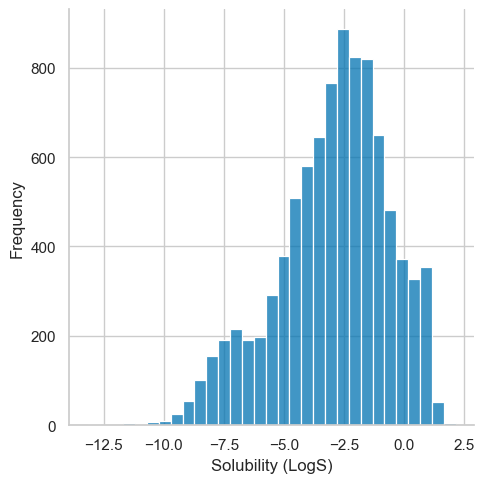

In [ ]:
sns.set_theme(style="whitegrid", palette="colorblind")
solubility_dist = sns.displot(df_desc, x = "Solubility", binwidth = 0.5)
solubility_dist.set_axis_labels("Solubility (LogS)", "Frequency of Compounds")